In [1]:
from os import path

import sys
sys.path.append(path.join("..", "notebooks"))
sys.path.append(path.join("..", "notebooks", "utils.py"))
import utils

import anndata
import numpy as np
import pandas as pd
import string
import gzip
import pickle

import matplotlib.pyplot as plt

# Batch effect figure

In [2]:
def rotate(degrees):
    phi = degrees * np.pi / 180
    return np.array([
        [np.cos(phi), -np.sin(phi)],
        [np.sin(phi), np.cos(phi)],
    ])

In [3]:
with gzip.open("batch_effect_pancreas.pkl.gz") as f:
    pancreas = pickle.load(f)
    
with gzip.open("batch_effect_brain.pkl.gz") as f:
    brain = pickle.load(f)

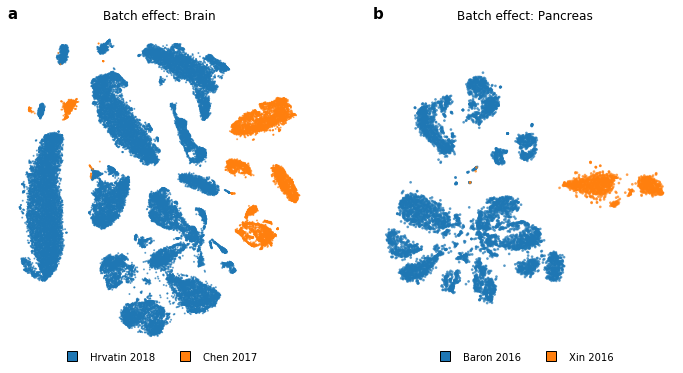

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

for ax_ in ax.ravel(): ax_.axis("equal")

for ax_, letter in zip(ax, string.ascii_lowercase): 
    plt.text(0, 1.02, letter, transform=ax_.transAxes, fontsize=15, fontweight="bold")

utils.plot(brain["embedding"] @ rotate(60), brain["source"], ax=ax[0], title="Batch effect: Brain", label_order=["Hrvatin 2018", "Chen 2017"],
           legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.025), bbox_transform=ax[0].transAxes, ncol=2))
utils.plot(pancreas["embedding"], pancreas["source"], ax=ax[1], s=3, title="Batch effect: Pancreas",
           legend_kwargs=dict(loc="upper center", bbox_to_anchor=(0.5, 0.025), bbox_transform=ax[1].transAxes, ncol=2))

plt.savefig("batch_effect.pdf", dpi=600, bbox_inches="tight", transparent=True)